In [18]:
# 절대모멘텀 전략

In [20]:
import pandas as pd
from pandas_datareader import data
from datetime import datetime
from numpy import inf

In [21]:
start_date = '2015-01-01'
end_date = datetime.today()

In [24]:
TICKER = '^KS11'
df = data.DataReader(TICKER, 'yahoo', start_date, end_date)
close = df['Close']

In [25]:
time_period = 20 # how far to look back to find reference price to compute momentum
history = [] # history of observed prices to use in momentum calculation
ab_Mom_values = [] # track momentum values for visualization purposes

for close_price in close:
    history.append(close_price)
    if len(history) > time_period: # history is at most 'time_period' number of observations
        del (history[0])

    ab_Mom = close_price - history[0]
    ab_Mom_values.append(ab_Mom)

df = df.assign(ab_Mom=pd.Series(ab_Mom_values, index=df.index))
df = df.assign(signal = pd.Series(df['ab_Mom'].apply(lambda x : '1' if x > 0 else '0')))

In [26]:
signal = df[['Adj Close', 'ab_Mom', 'signal']]
signal = signal.astype(float) 
signal[TICKER] =  signal['Adj Close'] * signal['signal']


In [27]:
signal['position'] =  signal['signal'].multiply(signal['Adj Close'], axis = 0)
signal['cash'] = float(10000) - (signal['signal'].diff().multiply(signal['Adj Close'], axis = 0)).cumsum()
signal['total'] =  signal['position'] +  signal['cash']

In [28]:
signal.tail(30)

,Adj Close,ab_Mom,signal,^KS11,position,cash,total
Date,,,,,,,
2021-07-14,3264.810059,-0.149902,0.0,0.000000,0.000000,11582.560303,11582.560303
2021-07-15,3286.219971,18.290039,1.0,3286.219971,3286.219971,8296.340332,11582.560303
2021-07-16,3276.909912,36.119873,1.0,3276.909912,3276.909912,8296.340332,11573.250244
2021-07-19,3244.040039,-19.839844,0.0,0.000000,0.000000,11540.380371,11540.380371
2021-07-20,3232.699951,-43.489990,0.0,0.000000,0.000000,11540.380371,11540.380371
2021-07-21,3215.909912,-70.190186,0.0,0.000000,0.000000,11540.380371,11540.380371
2021-07-22,3250.209961,-52.630127,0.0,0.000000,0.000000,11540.380371,11540.380371
2021-07-23,3254.419922,-47.469971,0.0,0.000000,0.000000,11540.380371,11540.380371
2021-07-26,3224.949951,-61.729980,0.0,0.000000,0.000000,11540.380371,11540.380371


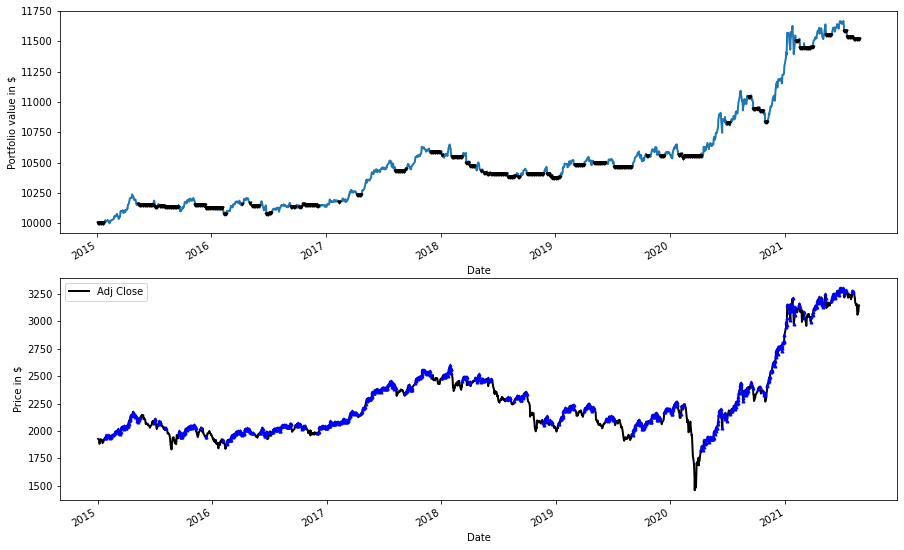

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(211, ylabel='Portfolio value in $')
signal['total'].plot(ax=ax1, lw=2.)
ax1.plot(signal.loc[signal.position == 0].index,signal.total[signal.position == 0],'v', markersize=3, color='k')
ax2 = fig.add_subplot(212, ylabel='Price in $')
signal['Adj Close'].plot(ax=ax2, color='black', lw=2., legend=True)
signal[signal['signal']==1]['Adj Close'].plot(color='b', linestyle='None', marker='^', markersize=3)
plt.show()